# Do yield curve inversions actually predict recessions?

**Purpose:** 'Yield curve inversions predict recessions' - in some form or another - is a statement repeated so often that even the most logical participants in financial markets take it as accepted wisdom. This project is my attempt to explore this statement with a higher degree of rigor than it usually receives. To start, I will look at all instances over the longest time period for which I can obtain data in which the yield curve inverted and compare to all recessions observed during that same time period. As a starting point, I will use the following definitions for *yield curve inversion* and *recession*:

    -Yield curve inversion: Yield on the benchmard 10-year U.S. Treasury Note minus the yield on the 3-month U.S Treasury Bill is less than zero.

    -Recession: "The series assigns dates to U.S. recessions based on a mathematical model of the way that recessions differ from expansions. Whereas the NBER business cycle dates are based on a subjective assessment of a variety of indicators, the dates here are entirely mechanical and are calculated solely from historically reported GDP data. Whenever the GDP-based recession indicator index rises above 67%, the economy is determined to be in a recession. The date that the recession is determined to have begun is the first quarter prior to that date for which the inference from the mathematical model using all data available at that date would have been above 50%. The next time the GDP-based recession indicator index falls below 33%, the recession is determined to be over, and the last quarter of the recession is the first quarter for which the inference from the mathematical model using all available data at that date would have been below 50%."


    Author: Matthew Garton
    Date: June 27, 2019
    

**Source of recession indicator (and above description):**
Hamilton, James, Dates of U.S. recessions as inferred by GDP-based recession indicator [JHDUSRGDPBR], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/JHDUSRGDPBR, June 27, 2019.

In [1]:
# import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl

In [2]:
# acquire data
yield_curve = quandl.get('USTREASURY/YIELD')
sp500 = quandl.get('MULTPL/SP500_REAL_PRICE_MONTH')
recessions = pd.read_csv('../data/Recessions.csv', header=0, names=['Date', 'Is Recession'])

In [3]:
# preprocess data
recessions['Date'] = pd.to_datetime(recessions['Date'])
recessions.set_index('Date', inplace=True)
recessions = recessions.resample('D').ffill()
recession_dates = recessions[recessions['Is Recession'] == 1.0].index

yield_curve['10yr-3mo'] = yield_curve['10 YR'] - yield_curve['3 MO']
yield_curve['5yr-2yr'] = yield_curve['5 YR'] - yield_curve['2 YR']
yield_curve.merge(recessions, on='Date')

sp500.rename(columns={'Value': 'sp500 Real Value'}, inplace=True)
sp500 = sp500.merge(recessions, on='Date')

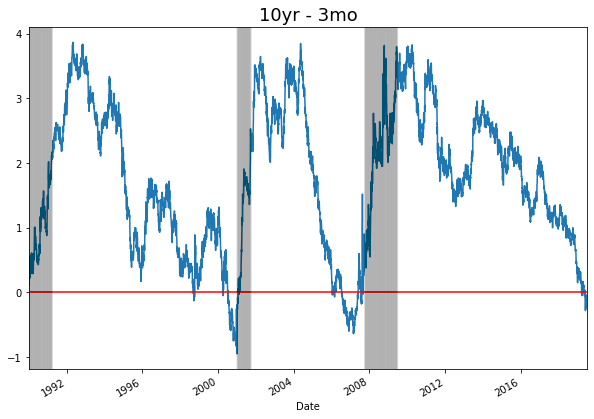

In [4]:
# Plot yield curve and recessions
yield_curve['10yr-3mo'].plot(figsize=(10,7))
plt.title('10yr - 3mo', fontsize=18)
plt.axhline(y=0, color='r')
for date in recession_dates:
    plt.axvline(date, color='k', alpha=0.01);

**Note:** The yield curve data provided by the U.S. Treasury (obtained from Quandl) is insufficient for analysis. With only three observations each of a recession and a yield curve inversion, not much can be said about the relationship - if there indeed is one - between the two.

Below, I extend my analysis using data obtained from the Federal Reserve Economic Database (St Louis Fed's FRED). Below is a link to the blog post which uses this data (the blog is from 2018 and discusses the same exact topic - I am essentially recreating their plot at this stage).

source: https://fredblog.stlouisfed.org/2018/10/the-data-behind-the-fear-of-yield-curve-inversions/

In [5]:
fred_data = pd.read_csv('../data/fredgraph.csv', skiprows=11, header=0, names=['Date', '10yr-1yr', '10yr-3mo'])
fred_data['Date'] = pd.to_datetime(fred_data['Date'])
fred_data.set_index('Date', inplace=True)
fred_data = fred_data.merge(recessions, on='Date')
fred_data.head()

,10yr-1yr,10yr-3mo,Is Recession
Date,,,
1967-10-01,0.11,0.92,0.0
1967-11-01,0.14,1.02,0.0
1967-12-01,-0.01,0.73,0.0
1968-01-01,0.10,0.53,0.0
1968-02-01,0.15,0.58,0.0


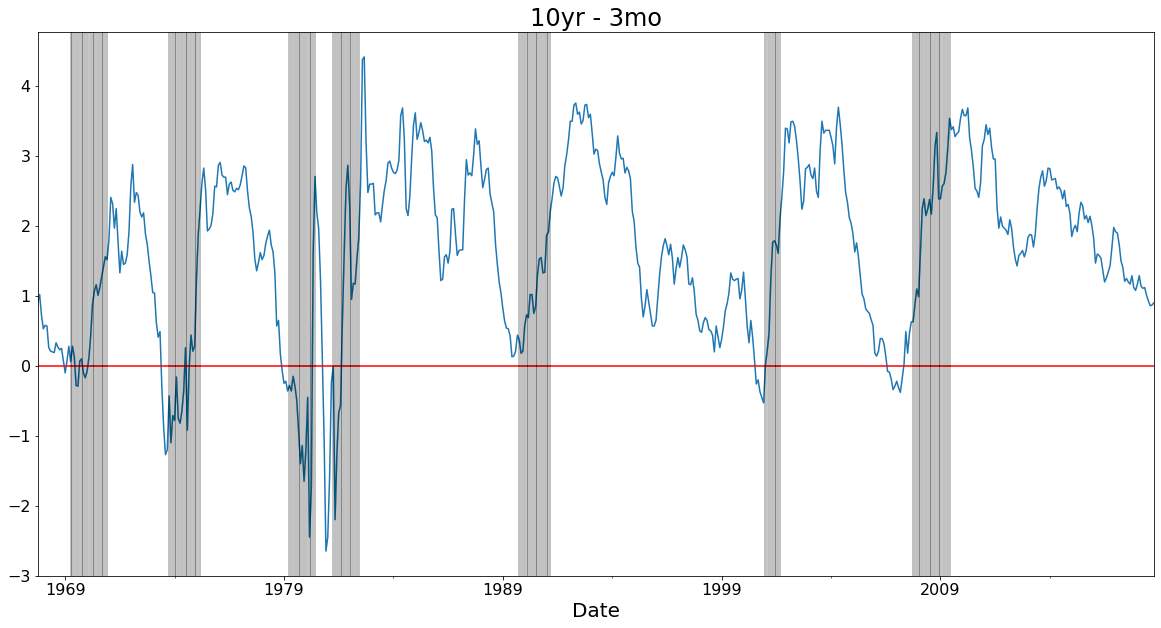

In [6]:
fred_data['10yr-3mo'].plot(figsize=(20,10))
plt.title('10yr - 3mo', fontsize=24)
plt.xlabel('Date', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axhline(y=0, color='r')
for date in recession_dates:
    plt.axvline(date, color='k', alpha=0.01);

### ...let's see what happens if I use the 10yr minus 1yr yield instead...

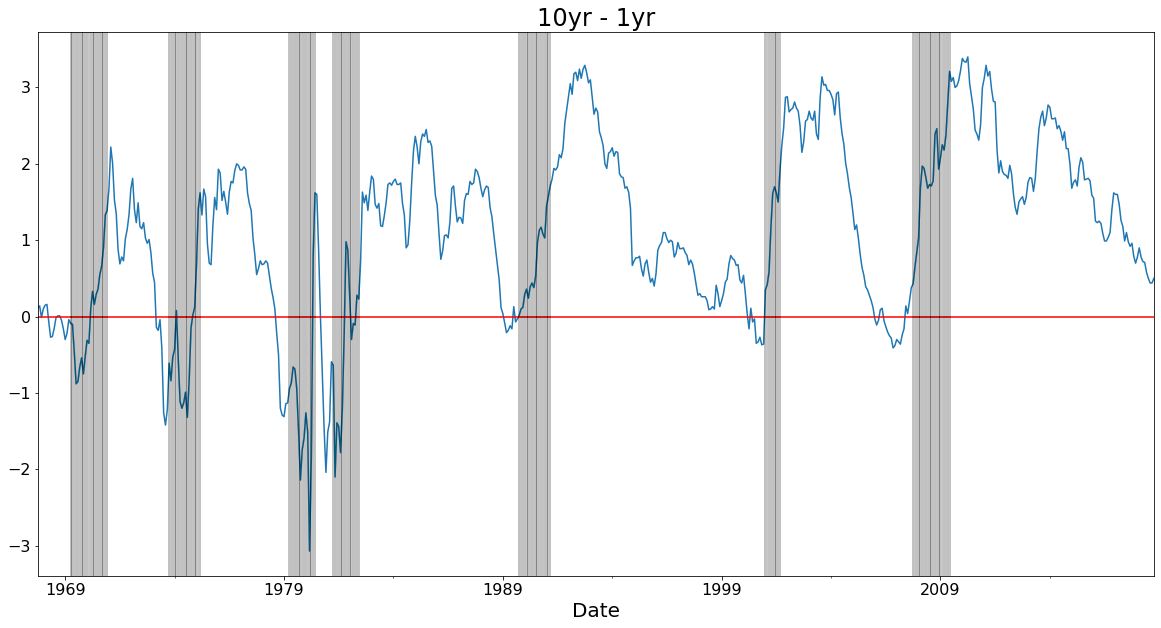

In [7]:
fred_data['10yr-1yr'].plot(figsize=(20,10))
plt.title('10yr - 1yr', fontsize=24)
plt.xlabel('Date', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axhline(y=0, color='r')
for date in recession_dates:
    plt.axvline(date, color='k', alpha=0.01);

## ...how about Fed Funds Rate and Recessions?

The reason why yield curve inversions are so interesting (aside from their track record at 'predicting' recessions) is that different segments of the yield curve are thought to be influenced by different factors. Broadly speaking, the 'long' end of the yield curve reflects market expectations of long-term growth and inflation, whereas the 'short' end of the yield curve is by and large controlled by the Federal Reserve (via their direct influence on short term interest rates - the Fed Funds rate to be precise.

The Fed Funds Rate is the Federal Reserves main tool for steering the economy, When the economy 'overheats' and higher inflation is the bigger risk, the Fed raises rates, slowing down growth to combat inflation. When the economy slows or contracts, the Fed will cut rates to try and stimulate growth.

In [8]:
# import fed funds data
fed_funds = pd.read_csv('../data/FEDFUNDS.csv', header=0, names=['Date', 'fed_funds'])

In [9]:
fed_funds['Date'] = pd.to_datetime(fed_funds['Date'])
fed_funds.set_index('Date', inplace=True)
fed_funds = fed_funds.merge(recessions, on='Date')
fed_funds.head()

,fed_funds,Is Recession
Date,,
1967-10-01,3.88,0.0
1967-11-01,4.13,0.0
1967-12-01,4.51,0.0
1968-01-01,4.60,0.0
1968-02-01,4.71,0.0


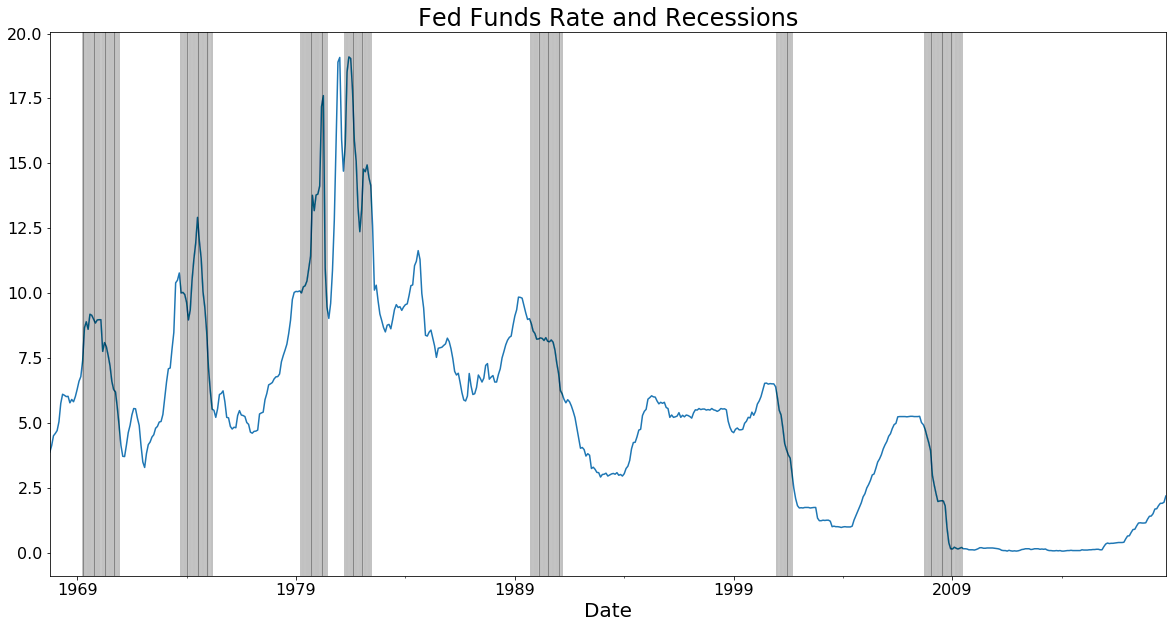

In [10]:
fed_funds['fed_funds'].plot(figsize=(20,10))
plt.title('Fed Funds Rate and Recessions', fontsize=24)
plt.xlabel('Date', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
for date in recession_dates:
    plt.axvline(date, color='k', alpha=0.01);

## Relationship between S&P 500 and Recessions

While understanding the relationship between the yield curve and recessions is interesting, as an investor I am only indirectly interested in predicting recessions. What I really care about is predicting the overall direction of the stock market. If there is a clear relationship between downturns in the stock market and recessions, and I can predict recessions using the yield curve, then I may have a basis for buying, selling, or even shorting the stock market based on the shape of the yield curve. The stock market is generally considered a leading indicator of the overall economy, so I would expect downturns in the market to 

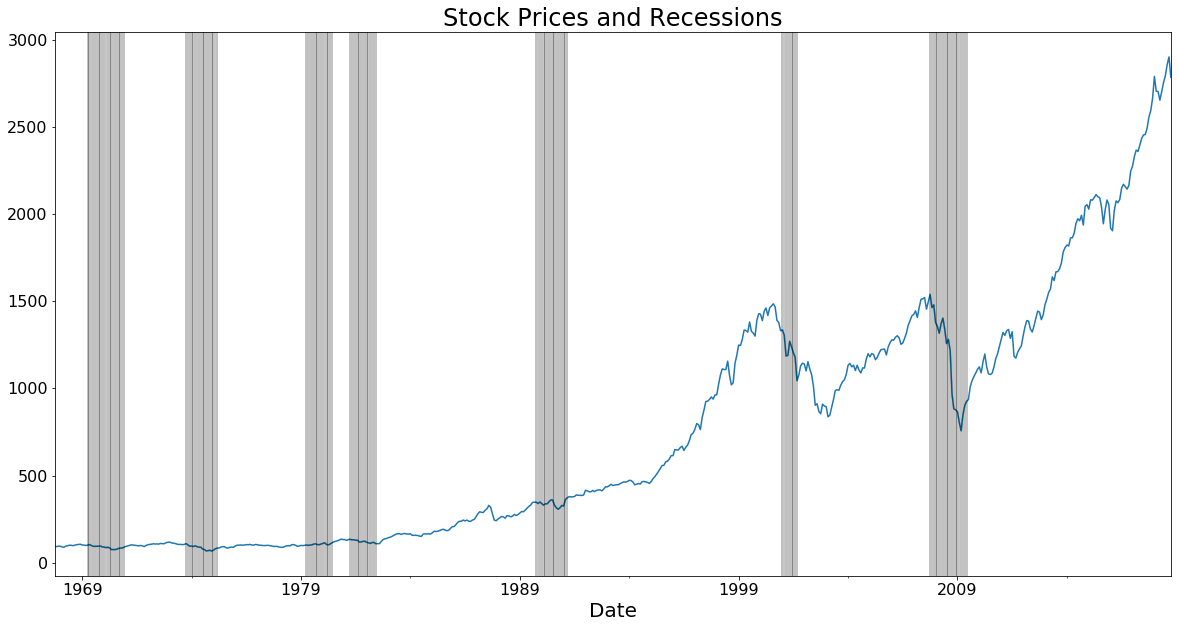

In [11]:
sp500['sp500 Real Value'].plot(figsize=(20,10))
plt.title('Stock Prices and Recessions', fontsize=24)
plt.xlabel('Date', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
for date in recession_dates:
    plt.axvline(date, color='k', alpha=0.01);

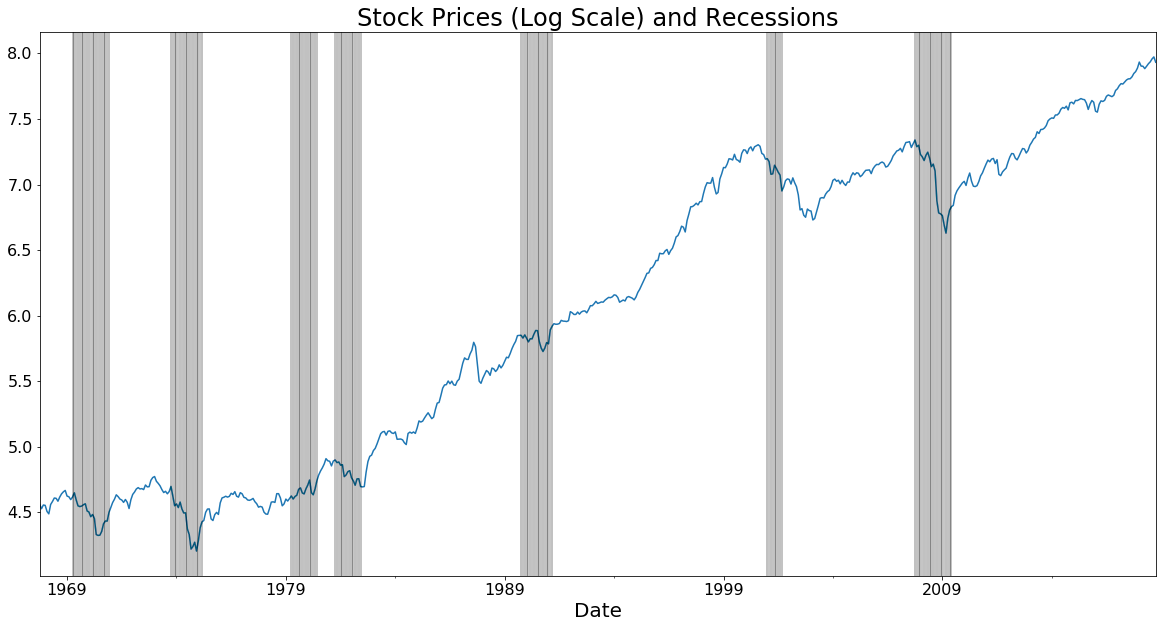

In [12]:
sp500['sp500_log_real_value'] = np.log(sp500['sp500 Real Value'])

sp500['sp500_log_real_value'].plot(figsize=(20,10))
plt.title('Stock Prices (Log Scale) and Recessions', fontsize=24)
plt.xlabel('Date', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
for date in recession_dates:
    plt.axvline(date, color='k', alpha=0.01);

# Conclusions